In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [326]:
import sys
try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.god_model_generator import god_model_sample
from src.god_model_estimator import estimate_mu_pi, probability_distribution_xs_given_pi, estimate_mu_given_pi, probability_distribution_x_given_pi, likelihood_distribution_xs_given_pi, estimate_mu_pi_grid
from src.compute_u import compute_u
from src.god_model_tools import evaluate_polynomial
import numpy as np
import matplotlib.pyplot as plt

In [327]:
def probability_x_given_pi_mu_from_u(m: int, x:int, pi: float, mu: int, u: np.ndarray) -> float:
    """ 
    Returns P(X=x | pi, mu) computed from u
    P(X=x | pi, mu) = pi^m sum_{d=0}^m [ (1-pi) / pi ]^d u[mu, x, d]
    
    Parameters
    ----------
    m : int
        Number of categories
    x : int
        Observed category
    pi : float
        Probability of error
    mu : int
        Supposed true category
    u : np.ndarray
        u coefficients computed with compute_u
    
    Returns
    -------
    float
        P(X=x | pi, mu)
    """
    p = pi**m * np.sum(((1-pi) / pi)**np.arange(m+1) * u[mu, x - 1, :])
    p_ = pi ** m * evaluate_polynomial(u[mu, x - 1], (1-pi) / pi)
    assert np.isclose(p, p_), f"p={p} != p_={p_}"
    assert 0 <= p <= 1, f"p={p} not in [0, 1]"
    return p

In [328]:
M = 5
u = compute_u(M)

In [329]:
for i in range(1, 6):
    for pi in [0.6, 0.7, 0.8, 0.9, 1.0]:
        xs = god_model_sample(m=5, mu=i, pi=pi, n_sample=1_000, seed=0)
        mu_hat, pi_hat, _ = estimate_mu_pi(m=5, data=xs, n_iter_max=10_000, pi_zero=0.7)
        mu_hat_knowing_pi = estimate_mu_given_pi(m=5, data=xs, pi=pi)
        print(f"mu={i}, mu_hat={mu_hat}, argmax P(X | mu) {mu_hat_knowing_pi} = mu ? {'Y' if mu_hat_knowing_pi == i else 'N' * 10}, pi={pi}, pi_hat={pi_hat:.2f} {'O' if mu_hat == i else 'X'}")

mu=1, mu_hat=2, argmax P(X | mu) 1 = mu ? Y, pi=0.6, pi_hat=0.54 X
mu=1, mu_hat=2, argmax P(X | mu) 1 = mu ? Y, pi=0.7, pi_hat=0.61 X
mu=1, mu_hat=2, argmax P(X | mu) 1 = mu ? Y, pi=0.8, pi_hat=0.61 X
mu=1, mu_hat=2, argmax P(X | mu) 1 = mu ? Y, pi=0.9, pi_hat=0.55 X


/media/DData/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/tests/god_model_estimator.py:69: RuntimeWarning: divide by zero encountered in log
  """


mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=2, mu_hat=3, argmax P(X | mu) 2 = mu ? Y, pi=0.6, pi_hat=0.51 X
mu=2, mu_hat=3, argmax P(X | mu) 2 = mu ? Y, pi=0.7, pi_hat=0.60 X
mu=2, mu_hat=3, argmax P(X | mu) 2 = mu ? Y, pi=0.8, pi_hat=0.63 X
mu=2, mu_hat=3, argmax P(X | mu) 2 = mu ? Y, pi=0.9, pi_hat=0.65 X
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=3, mu_hat=2, argmax P(X | mu) 3 = mu ? Y, pi=0.6, pi_hat=0.51 X
mu=3, mu_hat=1, argmax P(X | mu) 3 = mu ? Y, pi=0.7, pi_hat=0.51 X
mu=3, mu_hat=2, argmax P(X | mu) 3 = mu ? Y, pi=0.8, pi_hat=0.69 X
mu=3, mu_hat=4, argmax P(X | mu) 3 = mu ? Y, pi=0.9, pi_hat=0.69 X
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=4, mu_hat=3, argmax P(X | mu) 4 = mu ? Y, pi=0.6, pi_hat=0.51 X
mu=4, mu_hat=3, argmax P(X | mu) 4 = mu ? Y, pi=0.7, pi_hat=0.59 X
mu=4, mu_hat=3, argmax P(X | mu) 4 = mu ? Y, pi=0.8, pi_hat=0.67 X
mu=4, mu_hat=3, argmax P(X | mu) 4 = mu ? Y, pi=0.9, pi_hat=0.

In [336]:
for i in range(1, 6):
    for pi in [0.6, 0.7, 0.8, 0.9, 1.0]:
        xs = god_model_sample(m=5, mu=i, pi=pi, n_sample=1_000, seed=0)
        mu_hat, pi_hat, _ = estimate_mu_pi_grid(m=5, data=xs, nb_pi=100)
        mu_hat_knowing_pi = estimate_mu_given_pi(m=5, data=xs, pi=pi)
        print(f"mu={i}, mu_hat={mu_hat}, argmax P(X | mu) {mu_hat_knowing_pi} = mu ? {'Y' if mu_hat_knowing_pi == i else 'N' * 10}, pi={pi}, pi_hat={pi_hat:.2f} {'O' if mu_hat == i else 'X'}")

/media/DData/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/tests/god_model_estimator.py:166: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(evaluate_polynomial(p=u_mu[x - 1], x=t))


mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=0.6, pi_hat=0.61 O
mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=0.7, pi_hat=0.70 O
mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=0.8, pi_hat=0.79 O
mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=0.9, pi_hat=0.90 O


/media/DData/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/tests/god_model_estimator.py:69: RuntimeWarning: divide by zero encountered in log
  p += np.log(probability_distribution_x_given_pi(m, x, pi))


mu=1, mu_hat=1, argmax P(X | mu) 1 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=0.6, pi_hat=0.60 O
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=0.7, pi_hat=0.69 O
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=0.8, pi_hat=0.79 O
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=0.9, pi_hat=0.89 O
mu=2, mu_hat=2, argmax P(X | mu) 2 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=0.6, pi_hat=0.61 O
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=0.7, pi_hat=0.71 O
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=0.8, pi_hat=0.79 O
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=0.9, pi_hat=0.89 O
mu=3, mu_hat=3, argmax P(X | mu) 3 = mu ? Y, pi=1.0, pi_hat=1.00 O
mu=4, mu_hat=4, argmax P(X | mu) 4 = mu ? Y, pi=0.6, pi_hat=0.60 O
mu=4, mu_hat=4, argmax P(X | mu) 4 = mu ? Y, pi=0.7, pi_hat=0.69 O
mu=4, mu_hat=4, argmax P(X | mu) 4 = mu ? Y, pi=0.8, pi_hat=0.80 O
mu=4, mu_hat=4, argmax P(X | mu) 4 = mu ? Y, pi=0.9, pi_hat=0.

In [330]:
mu = 2
PI = 0.9
xs = god_model_sample(m=M, mu=mu, pi=PI, n_sample=100, seed=0)
xs

array([2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 4, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 4, 2, 2, 1, 4, 2, 2, 2, 1, 2])

In [335]:
%%timeit
estimate_mu_pi_grid(m=M, data=xs, nb_pi=1_000)

/media/DData/Data/M2/Cours/Probabilistic graphical models/Projet/Ordinal-data-clustering/tests/god_model_estimator.py:166: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(evaluate_polynomial(p=u_mu[x - 1], x=t))


1.23 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [334]:
nb_point = 10_000
likelihoods = np.empty(nb_point)
abscisses = np.linspace(0, 1, nb_point)
for i, pi in enumerate(abscisses):
    likelihoods[i] = likelihood_distribution_xs_given_pi(m=5, data=xs, pi=pi)[mu - 1]
abscisses[likelihoods.argmax()]

KeyboardInterrupt: 

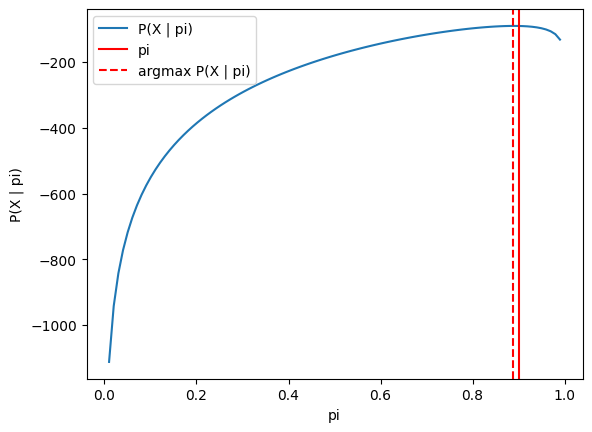

In [321]:
plt.plot(abscisses, likelihoods, label='P(X | pi) ')
plt.axvline(x=PI, color='r', label='pi')
plt.axvline(x=abscisses[likelihoods.argmax()], linestyle='--', color='r', label='argmax P(X | pi)')
plt.xlabel('pi')
plt.ylabel('P(X | pi)')
plt.legend()

In [322]:
mu_hat, pi_hat, ll, all_pis, all_lls = estimate_mu_pi(m=5, data=xs, pi_zero=0.7, n_iter_max=10, evolution=True)
mu_hat, pi_hat, ll

(3, 0.6541576019351939, -170.54125949158865)

In [325]:
all_lls[mu - 1]

[-116.47216730695854,
 -93.8656153616994,
 -90.48023425176959,
 -96.28393465495735,
 -106.63133708508208,
 -119.33045059125757,
 -133.28814801659558,
 -147.93379511540775,
 -162.9602486340026,
 -178.1990407867262,
 -193.55673042727082]

In [324]:
all_pis[mu - 1]

[0.7,
 0.8288319296960821,
 0.9040474240644942,
 0.9462928239285157,
 0.9698912654871437,
 0.9830941061269071,
 0.9904970626574114,
 0.9946547111009637,
 0.9969921372323651,
 0.9983070461798422,
 0.9990470075535007]

In [293]:
probability_distribution_xs_given_pi(M, xs, pi=0.6).argmax() + 1

2

In [295]:
likelihood_distribution_xs_given_pi(M, xs, pi=0.6).argmax() + 1

2

In [211]:
p = u[0, 4]
pi = 0.5623323468237743


array([0.        , 0.        , 0.83333333, 3.33333333, 3.5       ,
       1.        ])

In [214]:
probability_x_given_pi_mu_from_u(m=5, x=5, pi=pi, mu=1, u=u)

0.1824

In [ ]:
pi = 0.5623323468237743

evaluate_polynomial()

In [205]:
u[0]

array([[1.        , 3.5       , 3.33333333, 0.83333333, 0.        ,
        0.        ],
       [0.        , 1.        , 2.5       , 1.5       , 0.        ,
        0.        ],
       [0.        , 0.5       , 1.83333333, 1.83333333, 0.5       ,
        0.        ],
       [0.        , 0.        , 1.5       , 2.5       , 1.        ,
        0.        ],
       [0.        , 0.        , 0.83333333, 3.33333333, 3.5       ,
        1.        ]])

In [220]:
xs = god_model_sample(m=M, mu=1, pi=0.9, n_sample=20, seed=0)
xs

array([1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [221]:
for x in range(1, M + 1):
    for pi in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        error = np.abs(probability_distribution_x_given_pi(m=5, x=x, pi=pi) - np.array([probability_x_given_pi_mu_from_u(m=M, x=x, pi=pi, mu=mu, u=u) for mu in range(M)]))
        if error.max() > 1e-10:
            print(f"Error for x={x} is {error.max()}")

In [283]:
mu_hat, pi_hat, ll = estimate_mu_pi(m=5, data=xs, pi_zero=0.51, n_iter_max=10, evolution=False)
mu_hat, pi_hat, ll

(5, 0.9887969371114416, -17.029888312294442)

In [285]:
np.log(probability_distribution_xs_given_pi(m=5, data=xs, pi=0.9922093981395159)[4])

-11.794786516899228

In [239]:
all_pis[1]

[0.5, 0.51, 0.51]

In [240]:
all_lls[0]

[-130.62516534463455, -134.8258349448356, -134.8258349448356]